# Titanic - Apprentissage supervisé - classification

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" width="450" />

Le RMS Titanic est un paquebot transatlantique britannique qui fait naufrage dans l'océan Atlantique Nord en 1912 à la suite d'une collision avec un iceberg, lors de son voyage inaugural de Southampton (Angleterre) à New York (Etats-Unis d'Amérique). Entre 1 490 et 1 520 personnes trouvent la mort, ce qui fait de cet événement l'une des plus grandes catastrophes maritimes survenues en temps de paix et la plus grande pour l'époque.
- [source wikipedia](https://fr.wikipedia.org/wiki/Titanic)

Le jeu de données (ou dataset) du Titanic est un peu le "hello world" de l'apprentissage supervisé, le but est de trouver si les personnes présentent dans le fichier de données non-labellisées (test_data.csv) auraient survécu ou non lors du nauvrage de "l'Insubmersible".
Le résultat étant représenté par une variable qualitatives consituée de deux classes distinctes (0 = Décès, 1 = Survie), nous allons utiliser un algorithme de classification, voici une liste non exhaustive d'algorithmes de classification, donc d'apprentissage supervisés :
- L'arbre décisionnel (Decision Tree)
- Forêt d'arbres décisionnels (Random Forest)
- Régression Logistique (Logistic Regression)
- K-Plus proches voisins (KNN / K-Nearnest Neighbors)

Mis à part l'arbre décisionnel, il n'y a pas de méthodes meilleures qu'une autre, disons plutôt qu'il peut en avoir une plus adaptée qu'une autre dépedendamment de votre jeu de données.

# L'arbre décisionnel (Decision Tree)

Le principe de l'arbre de décision est très simple : on parcourt un ensemble de décisions (semblables à l'embranchement d'un arbre) et on parcourt l'arbre jusqu'à arriver à la solution (donc les feuilles).
![schéma arbre décisionnel](../_images/decision-tree.png)
Ci-dessus, voici un exemple d'arbre décisionnel concernant le jeu de données du Titanic. Vous remarquerez qu'un arbre de décision est très facile à lire, même sans avoir de connaissances en informatique / mathématiques.

Pour rappel, nous partons d'un dataset comme celui ci-dessous et on essaye d'obtenir un arbre de décision.

![schéma arbre décisionnel](../_images/dataset-to-tree.jpg)

Grâce à l'algorithme d'arbre décisionnel, nous n'avons qu'à désigner les caractéristiques (features) qui vont servir à prendre les décisions, le nombre d'embranchements (questions), et le reste sera fait tout seul. L'algorithme cherchant à trouver les questions les plus pertinentes, pour arriver à la réponse finale, dans notre cas il s'agit de la survie d'un passager du Titanic.

Le problème de cette méthode, c'est qu'elle est très instable concernant les résultats, étant donné qu'il n'y a qu'un seul et unique test, un arbre parcouru autrement dit, notre modèle peut être fortement soumis au surapprentissage (overfitting). Ce qui fait que lors de la phase de test sur données non-labellisées, le résultat sera aléatoire. Et en ML, on essaye le plus possible de limiter la variance des résultats. C'est là qu'entre en jeu l'algorithme de forêt d'arbres décisionnels (Random Forest).

# Forêt d'arbres décisionnels (Random Forest)

L'algorithme de forêt d'arbres décisionnels reprend le même principe que l'algorithme d'arbre décisionnel à la différence près que la forêt d'arbres décisionnels **va multiplier le nombre d'arbres,** le nombre de questions (enbranchements) resteront les mêmes, en revanche les questions posées, elles changeront aussi bien au niveau de l'ordre que leur contenu, ceci limite donc les risques de surapprentissage étant donné que notre modèle ne voit pas la même chose à chaque fois. On en déduit donc que plus il y a d'arbres dans notre forêt, moins notre modèle sera soumis au surentraînement. Néanmoins, effectuer un million d'arbres n'a pas vraiment d'intérêt.

![schéma arbre décisionnel](../_images/decision-tree-vs-random-forest.png)

A la fin, notre algorithme va définir un seul et unique arbre basé sur les résultats des différents arbres.

- [Différence arbre décisionnel et Forêt d'arbres décisionnels - anglais](https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991)

# Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.


```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Charger des fichiers distants (depuis un serveur)

La classe `request` de Python permet d'effectuer des requêtes serveur, on peut l'utiliser de la façon suivante pour **télécharger** un fichier distant.

```python
request.urlretrieve ("lien-du-fichier", "reference-locale-du-fichier")
df = pd.read_csv("reference-locale-du-fichier")
```

# Pratiquons !

Maintenant que nous avons vu deux algorithmes de classification, nous pouvons nous essayer à l'apprentissage supervisé avec les données des passagers du RMS Titanic. Et comme d'habitude, on commence par... 

# à-vous-de-remplacer-le-titre

In [1]:
# Vu qu'on va manipuler des dataframes, on n'oublie pas d'importer "pandas" et "numpy"
import numpy as np
import pandas as pd

# Ensuite on charge nos données
# train.csv va nous servir à entraîner notre modèle
# test_data.csv nous servira après pour valider notre modèle en utilisant des donnes non-labellisées
entrainement_df = pd.read_csv("train_data.csv")
display(entrainement_df.head())

test_df = pd.read_csv("test_data.csv")
# Faire la même chose avec le fichier de test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Explication des noms des colonnes
Liste non-exhaustive
- PassengerId : Identifiant unique du passager
- Survived : 0 = Décès, 1 = En vie
- Pclass : La classe de voyage (1 = 1ere classe, 2 = 2ème classe, 3 = 3ème classe)
- Name : Le nom du passager
- Sex : Le sexe du passager
- Age : L’age du passager
- SibSp (Siblings / Spouses) : Le nombre de frères et soeurs ou époux / épouses à bord
- Parch (Parents / Children) : Le nombre de parents ou enfants à bord
- Ticket : Le numéro du billet de voyage
- Fare : Le prix du billet de voyage
- Cabin : Le numéro de la cabine
- Lifeboat : Identifiant du canot de sauvetage
- Destination : Lieu de destination du Passager
- Body : identifiant du corps
- Embarked : Lieu d’embarquement du passager (C = Cherbourg, S = Southampton, Q = Queenstown)
- WikiId, Name_wiki, Age_wiki : Valeur de la donnée sur le wiki du Titanic

Essayons de répondre aux questions suivantes, ceci nous permettra de mieux comprendre notre jeu de données :
- Quelles sont les colonnes de notre jeu de données d'entraînement (entrainement_df) ?
- Combien de valeurs sont présentes dans le jeu de données de test (test_df) ?
- Combien il y avait de femmes / hommes ?
- Quel est le ratio de femmes / hommes survivants ?
- Quel est l'âge moyen des passagers ?
- Quel est la femme survivante la plus âgée ? (ligne)
- Quel est l'âge de l'homme survivant le plus jeune ? (valeur)


# A vous de coder

A partir du DataFrame d'entraînement (train_data.csv), répondre aux questions précédentes. N'oubliez pas la fonction `display()` pour afficher les résultats.

In [2]:
# Combien il y avait de femmes ?
nbr_femmes = len(entrainement_df[entrainement_df.Sex == "female"])
display(f"Il y avait {nbr_femmes} femmes sur le Titanic")

'Il y avait 314 femmes sur le Titanic'

### f-strings

Vous remarquerez que dans notre cellule précédente, nous avons un "f" qui préfixe notre chaîne de caractères. Cette lettre est très importante, c'est la syntaxe d'une "f-strings", ceci pourrait se traduire en "chaîne de caractères formattée". Grâce aux f-strings, il nous est possible de subsituer une variable par sa valeur dans une chaîne de caractère.

```python
nom_cours = "Big Data et Open Data"

print(f'Je suis en cours de {nom_cours}')
```
"Je suis en cours de Big Data et Open Data" sera affiché dans la cellule de sortie.

Notez que les f-strings fonctionnent aussi bien avec les guillemets simples (') et doubles (").

- [Plus d'infos sur f-strings](https://he-arc.github.io/livre-python/fstrings/index.html)

In [3]:
# Quelles sont les colonnes de notre jeu de données d'entraînement (entrainement_df) ?

# Combien de valeurs sont présentes dans le jeu de données de test (test_df) ?

# Quel est le ratio de femmes / hommes survivants ?

# Quel est l'âge moyen des passagers ?

# Quel est la femme survivante la plus âgée ? (ligne)

# Quel est l'âge de l'homme survivant le plus jeune ? (valeur)

# Phase 4 : Nettoyage de données

## A vous de coder

Sur les deux DataFrame effectuer les tâches suivantes :
- Transformer en entier l'âge des passagers
- Supprimer les colonnes "WikiId, Name_wiki, Age_wiki"

In [4]:
 Choisir un modèle d’apprentissage

SyntaxError: invalid syntax (<ipython-input-4-4fe10088be2f>, line 1)

# Phase 5 : Choissions notre modèle d'apprentissage 

Notre but est de trouver si les membres de notre fichier de test non-labellisé (test_data.csv) auraient survécu ou non lors du naufrage du Titanic. Pour ce faire, nous allons utiliser un algorithme supervisé de classification, en l'occurence celui de la forêt d'arbres décisionnels (voir plus haut pour le principe de l'algorithme).

C'est la bibliothèque scikit-learn qui va nous aider pour l'apprentissage automatique, elle est très utilisée dans le monde professionnel et intégrée nativement à Jupyter, toutefois, il ne faut pas oublier de l'importer pour pouvoir l'utiliser. La bibliothèque étant très complète nous allons limiter l'import qu'à l'algorithme de "Forêt d'arbres décisionnels" avec la ligne de code suivante `from sklearn.ensemble import RandomForestClassifier`.

- [voir documentation classe "RandomForestClassifier"](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Dernier point concernant scikit-learn, la bibliothèque contient des jeux de données par défaut :
- [Plus d'explication sur les jeux de données par défaut](http://www.python-simple.com/python-scikit-learn/scikit-datasets.php)

## A nous de coder

In [49]:
# On importe la classe permettant d'utiliser l'algorithme de forêt d'arbres décisionnels
from sklearn.ensemble import RandomForestClassifier

# La première chose que nous allons faire c'est désigner les features de notre modèle, 
# autrement dit, les caractéristiques de notre dataframe qui peuvent avoir une importance sur la survie d'une personne
# Par exemple le nom d'un passager ou sa destination ne risque pas d'influencer sa survie.

# Ici on met notre liste de features, 
# les paramètres qu'on estime importants quant à la survie ou non d'un passager lors du naufrage du RMS Titanic.
liste_features = []

Ensuite, on va catégoriser nos features, on a vu précédemment que les algorithmes de classification fonctionnent avec des données qualitatives ou quantitatives. Mais en programmation, on reste toujours plus performant avec des chiffres, 
c'est là qu'entre en jeu l'encodage des données, et plus précisément l'encodage one-hot. Le but de cette phase est de transformer en chiffres des données textuelles et pandas a une fonction pour ça, la fonction "get_dummies()" qui prend en paramètres nos features.

![schéma one hot](../_images/one-hot.png)
- [Plus d'infos sur l'encodage one-hot (wikipedia)](https://fr.wikipedia.org/wiki/Encodage_one-hot)
- [Plus d'infos sur l'encodage one-hot](https://www.datacorner.fr/one-hot/)

A noter que cet encodage est très sensible au format des données, il ne sait pas bien gérer les données absentes, d'où l'importance de la phase de nettoyage/formattage des données.

In [50]:
# On applique la fonction sur les deux jeux de données
X_entrainement = pd.get_dummies(entrainement_df[liste_features])
X_test = pd.get_dummies(test_df[liste_features])
# Vous pouvez afficher le contenu du DataFrame "X_entrainement" ou "X_test" pour voir l'encodage One-hot à l'oeuvre.

In [51]:
# X_train, X_test sont donc maintenant prêtes à être utilisé par l'algorithme.
# Il nous manque une petite chose, définir la feature de sortie, dans notre cas "Survived"
# grâce à la ligne suivante
Y_entrainement = entrainement_df['Survived']

# Voilà, tous nous paramètres sont prêts, nous pouvons maintenant utiliser 
# notre algorithme de forêt d'arbres décisionnels avec la classe "RandomForestClassifier"
foret_decisions_model = RandomForestClassifier(
    n_estimators=100, # Nombre d'arbres décisionnels
    max_depth=5, # Profondeur de notre arbre (plus le chiffre sera grand, plus notre arbre sera diversifié)
    
    # Définit la qualité des embranchements, "gini (impurty)" est la valeur par défaut, 
    # on l'indique car ça nous servir plus tard.
    # L'impureté de Gini est une mesure de la probablité de mal classer un élément, 
    # s'il doit être labellisé aléatoirement
    # 0 = peu probable
    # 1 = très probable
    # Plus d'explications (en anglais) : https://victorzhou.com/blog/gini-impurity/#recap
    criterion="gini"
)

# La classe accepte d'autres paramètres, nous aurions pu également ne pas en mettre et utiliser les valeurs par défaut
# (voir lien vers la documentation, lien plus haut)

# Maintenant, il nous faut entraîner notre modèle, donc lui apprendre à comprendre quand une personne à survécu ou non
# on utilise donc la méthode "fit", on lui défini donc les features (X_entrainement) et les sorties (Y_entrainement)
# ça peut prendre un peu de temps
foret_decisions_model.fit(X_entrainement, Y_entrainement)

# Pour valider la précision de notre modèle, il nous est possible d'utiliser la méthode "score",
# par défaut, elle retourne une valeur comprise entre "0" et "1", on va donc la multiplier par 100 et l'arrondir
# à deux décimales pour avoir un pourcentage
acc_random_forest = round(foret_decisions_model.score(X_entrainement, Y_entrainement) * 100, 2)
display(f"Score de notre modèle {acc_random_forest}%")

# Une fois notre modèle entraîné, il nous est possible de prédire les valeurs pour notre jeu d'entraînement
# avec la méthode "predict"
modele_predictions = foret_decisions_model.predict(X_test)

# Pour terminer, on va créer un dataframe avec nos prédictions (modele_predictions)
predictions_df = pd.DataFrame({
    "Name" : test_df.Name, 
    "PassengerId" : test_df.PassengerId, 
    "Age" : test_df.Age, 
    "Survived": modele_predictions
})

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Bien évidemment, on peut explorer nos données comme nous avons fait précédemment.

- Combien de personnes ont survécu ?
- Quelle est la moyenne d'âge des survivants ?
- ...

Il faudra faire attention aux colonnes de notre DataFrame avant.

In [ ]:
# Et sauvegarder le tout dans un fichier csv, pour plus de lisibilité.
# predictions_df.to_csv("tmp_survivants-test.csv")

# Regardons notre forêt de plus près

Plus haut, nous avons utilisé la classe "RandomForestClassifier" pour générer notre forêt d'arbres de décisions. D'ailleurs, il est possible d'en voir le contenu grâce à la propriété `estimators_`, **la propriété doit impérativement être appelée après la méthode `fit()`**, et ça nous donne quelque chose comme ceci (sortie limitée à deux entrées).

```
[
    DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=1551185029),
    DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=1378273388)
]
```
Première observation : la propriété contient des DecisionTreeClassifier, soit des "arbre de décisions". Notre forêt d'arbre de décisions est bel et bien composée d'arbres de décisions. C'est bien, en revanche, ce n'est pas très compréhensible, d'autant plus que nous avons dit que que c'était facilement lisible, alors nous allons en faire un graphique. Et pour ce faire, nous allons introduire une nouvelle bibliothèque (elle aussi déjà présente dans Jupyter) : matplotlib

![matplotlib logo](https://matplotlib.org/stable/_static/logo2_compressed.svg)

_"Matplotlib est une bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous formes de graphiques. Elle peut être combinée avec les bibliothèques python de calcul scientifique NumPy et SciPy."_ - Wikipedia
- [Lien vers la description sur wikipedia](https://fr.wikipedia.org/wiki/Matplotlib)
Note : SciPy est une super bibliothèque scientifique pour Python contenant notamment NumPy ou encore matplotlib.

On va donc utiliser matplotlib pour modéliser nos arbres de décisions. Etant donné que la bibliothèque est intégrée à Jupyter / Google Colab, on n'a qu'à l'importer avec la ligne de code suivante `import matplotlib.pyplot as plt`. Le graphique que nous allons faire est réalisable avec scikit-learn directement, mais les options sont trop limitées.

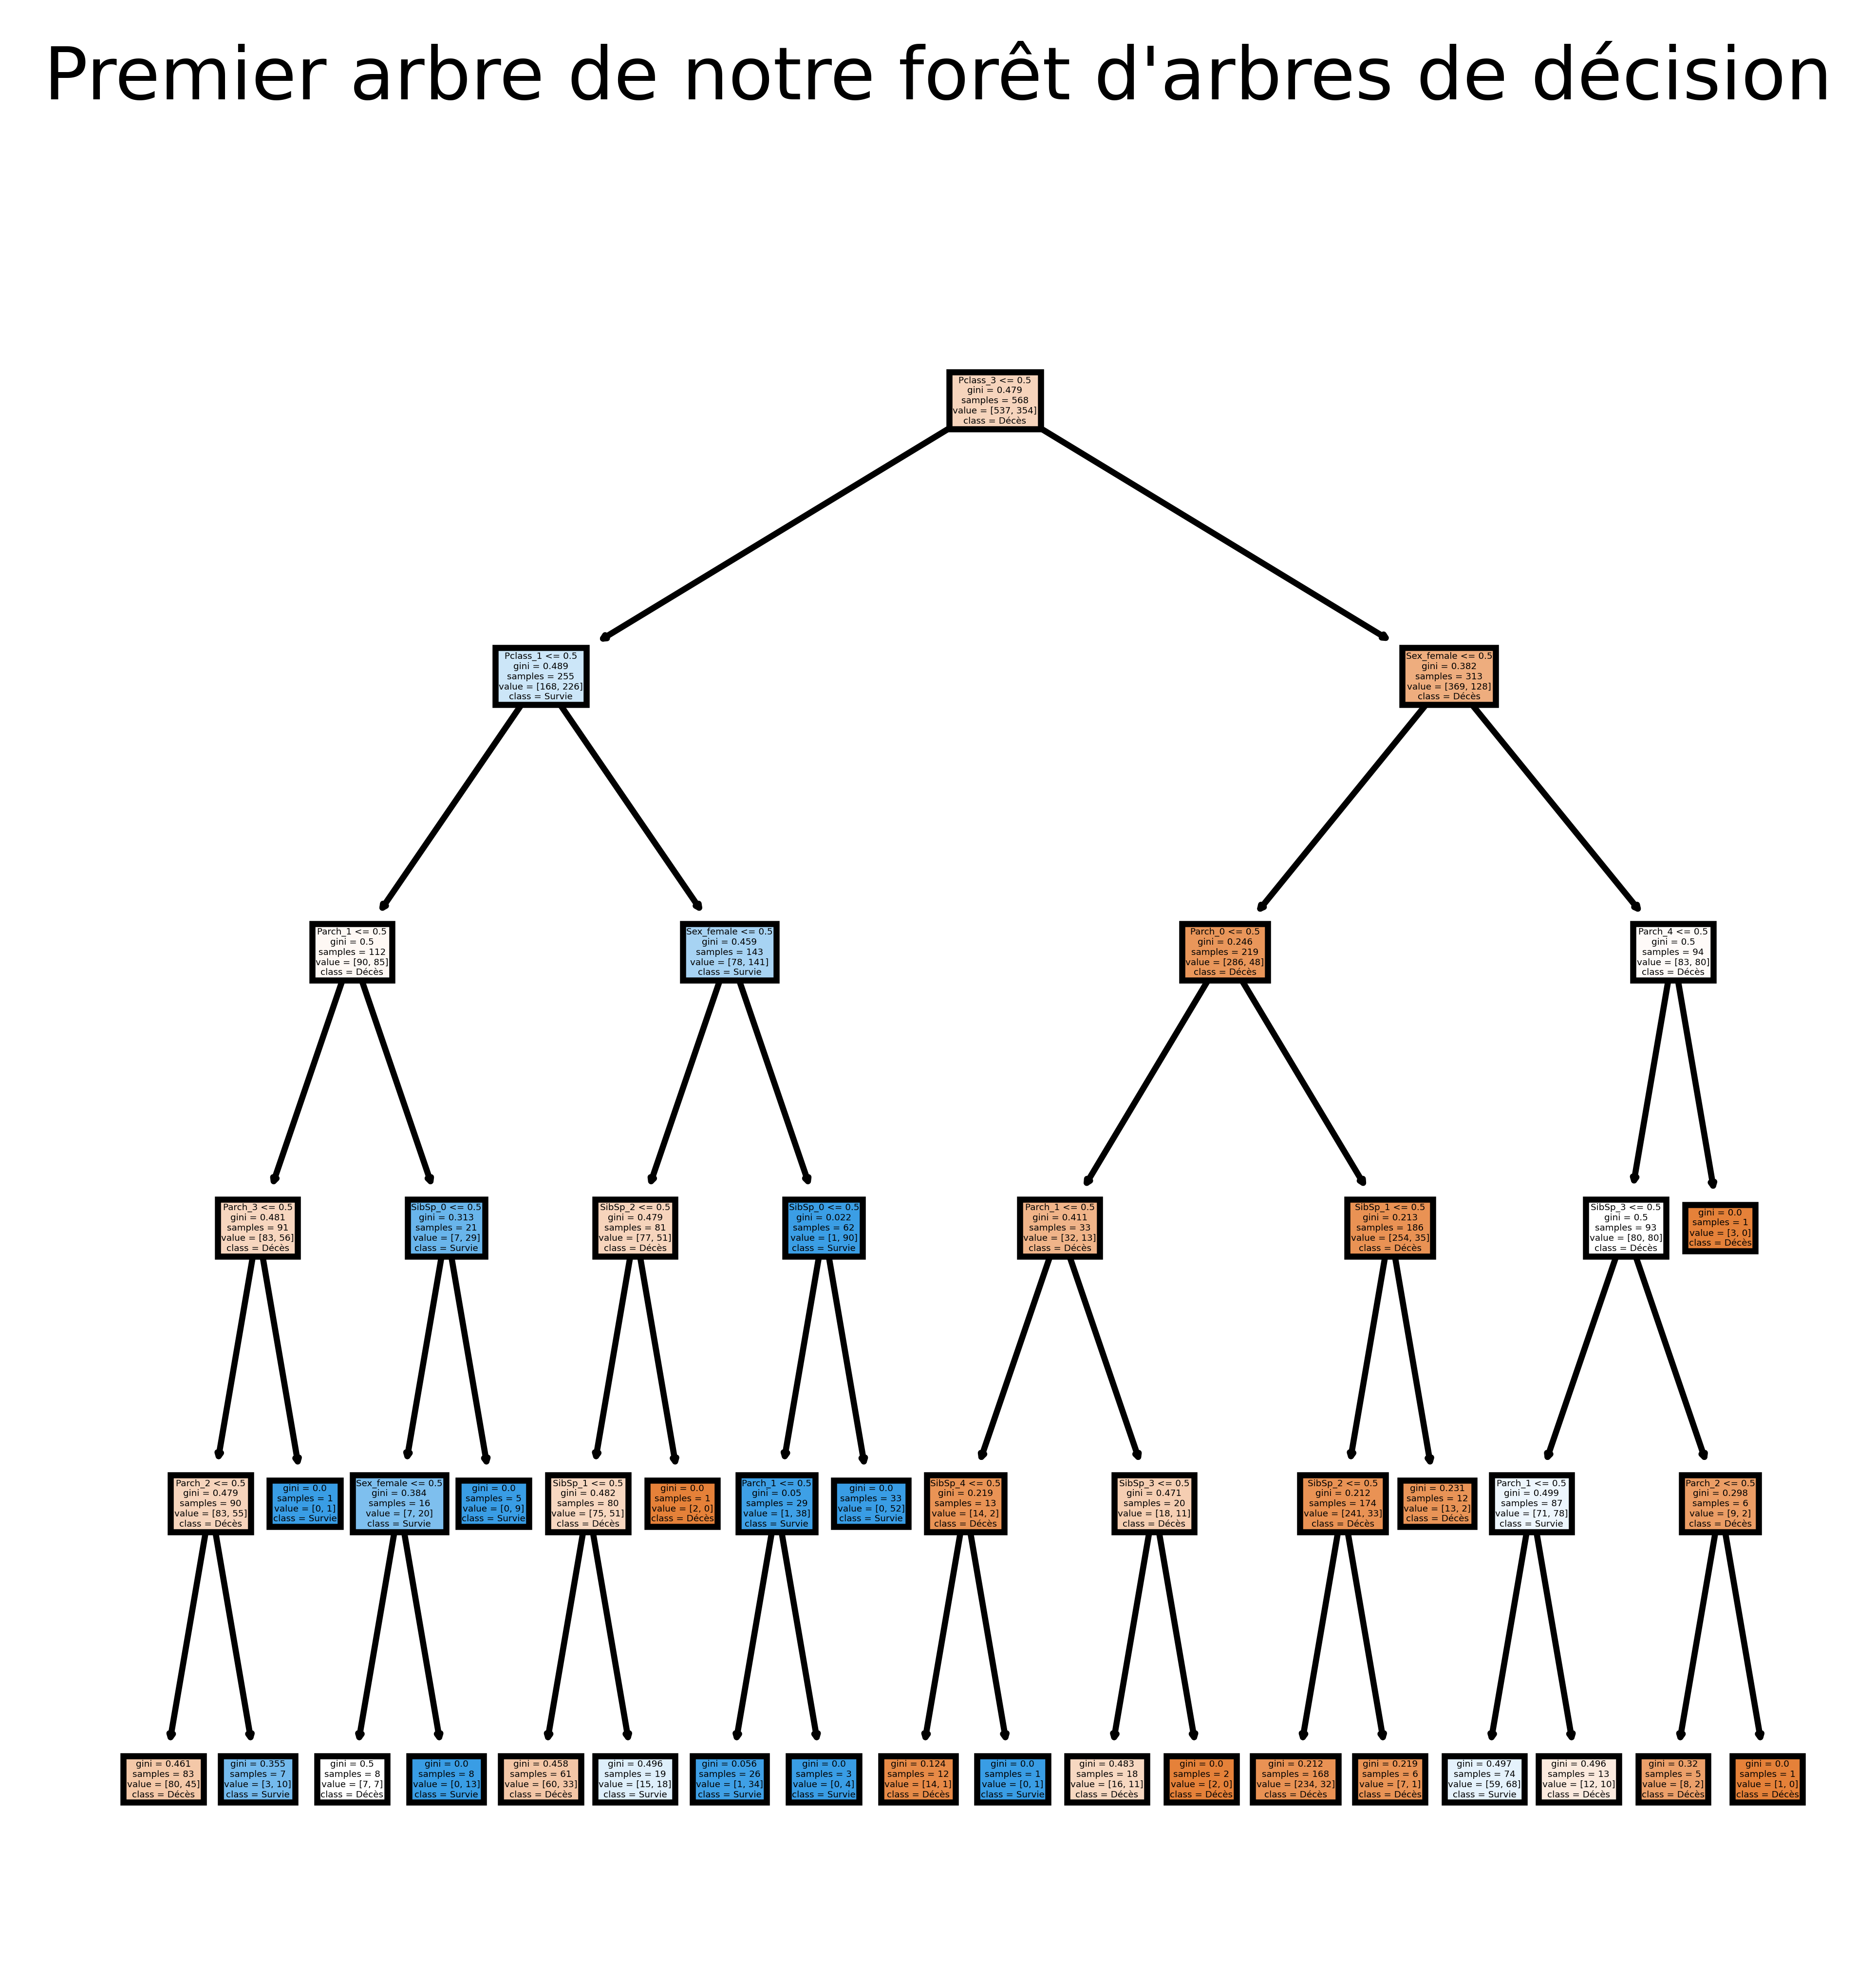

In [42]:
# Import de matplotlib.pyplot et tree de sklearn
import matplotlib.pyplot as plt
from sklearn import tree

# Ces lignes de codes permettent d'avoir des libellés de classes plus clairs
# 0 = Décès
# 1 = Survie

def renomme_classes (x):
    return "Décès" if int(x) == 0 else "Survie" 
# La fonction "map" permet d'appliquer une fonction sur chaque élément de la liste
liste_classes = list(map(renomme_classes, list(foret_decisions_model.classes_)))

liste_noms_features = list(X_entrainement.columns.values)
liste_nom_classes = liste_classes

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5), dpi=900)
fig.suptitle(f"Premier arbre de notre forêt d'arbres de décision")

tree.plot_tree(
    foret_decisions_model.estimators_[0],
    feature_names = liste_noms_features, 
    class_names = liste_nom_classes,
    filled = True
);

# Il nous est possible de sauvegarder notre graphique dans un fichier image
# fig.savefig('tmp_individualtree.png')

Ça y est on a effectué une classification sur notre jeu de données du Titanic, néanmoins nous avons obtenus un score de ~80.92% (ça peut varier pour vous) pour notre modèle, c'est bien, mais pouvons-nous faire mieux ? On pourrait changer d'algorithme ? Trop compliqué. On pourrait revoir nos features ? On peut faire mieux, oui, mais bon. On pourrait changer la valeur des hyperparamètres (paramètres d'un algorithme) trop compliqué et trop long de changer les valeurs puis réexécuter la cellule... quoique. 

Scikit learn étant bien fait, il nous est donné la possibilité de jouer sur les hyperparamètres sans toucher à notre cellule plus haut pour ce faire, nous allons utiliser la classe `validation_curve` (et l'importer). Son fonctionnement est très simple, elle lui faut au minimum la classe d'un modèle (dans notre cas RandomForestClassifier()), des entrées et des sorties (d'entraînement) et l'hyper-paramètre qui doit voir sa valeur changer.

- [Voir documentation de validation (anglais)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)

In [36]:
# On importe validation_curve
from sklearn.model_selection import validation_curve

k = np.arange(90, 120)
nb_cross_validation = 5
h_param_variant = "n_estimators"
train_score, val_score = validation_curve(
    RandomForestClassifier(), # Le modèle à tester 
    X_entrainement, # Les features d'entraînements
    Y_entrainement, # Les sorties
    param_range = k, # La plage de variation de notre hyperparamètre
    param_name = h_param_variant, # L'hyperparamètre qui doit varier
    cv = nb_cross_validation # Le nombre de cross-validation
)

### Cross-validation

On a vu précédemment que la chose que nous souhaitons éviter le plus possible c'est le sur-entraînement du modèle (overfitting en anglais). Dans le cadre de ces Travaux Pratiques, nous avons deux fichiers : un de test et un autre d'entrainement. Il arrive souvent qu'il n'y ait pas de fichier(s) de test, c'est là qu'intervient la cross-validation (ou validation croisée). Le but de cette technique est de séparer notre jeu de données d'entrainement en deux parties : 
- Une partie de test
- Une partie d'entrainement

La partie de test, bien que libellée dans le fichier, devient non-libellisée lors de cette étape. Généralement, on essaye d'avoir ~80 % de données d'entraînement, et donc ~20 % de données de test. Plus il y aura de cross-validation, plus notre modèle sera robuste. Si on schématise, ça donne quelque chose comme ceci.
![schéma cross validation](../_images/cross-validation.png)

On remarque qu'il y a cinq cross validation, et que le jeu de test "glisse" à chaque test, logique, on veut éviter le surentraînement.

- [Plus d'informations sur la cross-validation (validation croisée) sur wikipedia](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e)

Prenant en compte ce notion de cross-validation, notre exemple plus haut peut être écrit de la façon suivante

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    pd.get_dummies(entrainement_df[liste_features]), 
    Y_entrainement, 
    test_size=0.2 # Ici 20 % de notre jeu de données d'entraînement devient non-labellisé
)


foret_decisions_split = RandomForestClassifier(n_estimators=100, max_depth=5)
foret_decisions_split.fit(x_train, y_train)
modele_predictions = foret_decisions_split.predict(X_test)

acc_random_forest_split = round(foret_decisions_split.score(x_train, y_train) * 100, 2)
display(f"Score de notre modèle {acc_random_forest_split}%")

'Score de notre modèle 81.74%'

['Cross validation #1', 'Cross validation #2', 'Cross validation #3', 'Cross validation #4', 'Cross validation #5', 'Cross validation #6', 'Cross validation #7', 'Cross validation #8', 'Cross validation #9', 'Cross validation #10', 'Cross validation #11', 'Cross validation #12', 'Cross validation #13', 'Cross validation #14', 'Cross validation #15', 'Cross validation #16', 'Cross validation #17', 'Cross validation #18', 'Cross validation #19', 'Cross validation #20', 'Cross validation #21', 'Cross validation #22', 'Cross validation #23', 'Cross validation #24', 'Cross validation #25', 'Cross validation #26', 'Cross validation #27', 'Cross validation #28', 'Cross validation #29', 'Cross validation #30', 'Cross validation #31', 'Cross validation #32', 'Cross validation #33', 'Cross validation #34', 'Cross validation #35', 'Cross validation #36', 'Cross validation #37', 'Cross validation #38', 'Cross validation #39', 'Cross validation #40', 'Cross validation #41', 'Cross validation #42', 

,Cross validation #1,Cross validation #2,Cross validation #3,Cross validation #4,Cross validation #5,Cross validation #6,Cross validation #7,Cross validation #8,Cross validation #9,Cross validation #10,...,Cross validation #141,Cross validation #142,Cross validation #143,Cross validation #144,Cross validation #145,Cross validation #146,Cross validation #147,Cross validation #148,Cross validation #149,Cross validation #150
0,0.825843,0.824684,0.817672,0.824684,0.814867,0.825843,0.824684,0.817672,0.824684,0.814867,...,0.825843,0.824684,0.817672,0.824684,0.814867,0.825843,0.823282,0.817672,0.824684,0.814867


Text(0.5, 1.0, "Variation de l'hyperparamètre n_estimators")

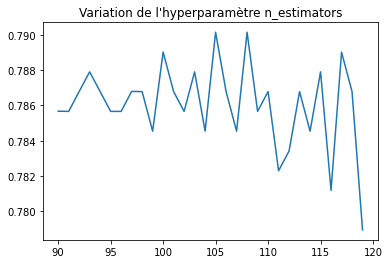

In [37]:
def generer_df_colonnes(nb_cross_validation):
    return f'Cross validation #{nb_cross_validation + 1}'

# On fait un dataframe de notre résultat

# Les lignes de codes suivantes sont là pour générer automatiquement les noms de colonnes en fonction
# des paramètres "param_range" et "cv mis plus haut"

range_premiere_val = list(k)[0]
range_dernier_val = list(k)[-1]
 
nb_cross_validation_range = nb_cross_validation * ((range_dernier_val + 1) - range_premiere_val)
columns=list(map(generer_df_colonnes, np.arange(0, nb_cross_validation_range) ))

# Affiche un dataset des valeurs de notre validation croisée
# data = pd.DataFrame(np.array([train_score.flatten()]), columns=columns) # , columns=columns
# display(data)

plt.plot(k, val_score.mean(axis=1))
plt.title(f"Variation de l'hyperparamètre {h_param_variant}")

Ceci met fin à notre pratique sur l'apprentissage supervisé de classification. On aurait pu essayer d'autres modèles comme le "KNeighborsClassifier", d'ailleurs nous pouvez vous y essayer, voici le code

```python 
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier() # A vous de voir pour les paramètres
model.fit(X_entrainement, Y_entrainement)

acc_random_forest_split = round(model.score(X_entrainement, Y_entrainement) * 100, 2)
display(f"Score de notre modèle {acc_random_forest_split}%")

predictions = model.predict(X_test)
predictions_df = pd.DataFrame({
    "Name" : test_df.Name, 
    "PassengerId" : test_df.PassengerId, 
    "Age" : test_df.Age, 
    "Survived": predictions
})
```